Import all needed resources

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from Evaluations import evaluate_classification_model
from sklearn.linear_model import LogisticRegression
from Evaluations import evaluate_classification_model

from Prep_Data import load_student_data, explore_student_data, prepare_data_for_training, engineer_features
from Analysis import univariate_analysis, bivariate_analysis


Loading Data, cleaning data, removing outliers, removing redundant data, feature engineering and splitting test and training data

In [2]:
df = load_student_data("../Data/Student_performance_data .csv")
df = engineer_features(df)
X_train, X_test, y_train, y_test = prepare_data_for_training(df)


Data loaded successfully.
Removed 0 rows with missing values.
Removed 0 outliers in GPA.
Removed 0 outliers in StudyTimeWeekly.
Removed 0 outliers in Absences.
Removed 0 outliers in Age.
Added TotalActivities (sum of activities).
Added AbsencesBinned (Low, Medium, High).
Converted AbsencesBinned to numerical codes.
Added StudyTimePerAbsence (StudyTimeWeekly / (Absences + 1)).

Data split: 1913 training and 479 testing samples.


Data Understanding

In [3]:
explore_student_data(df)


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            2392 non-null   int64  
 1   Age                  2392 non-null   int64  
 2   Gender               2392 non-null   int64  
 3   Ethnicity            2392 non-null   int64  
 4   ParentalEducation    2392 non-null   int64  
 5   StudyTimeWeekly      2392 non-null   float64
 6   Absences             2392 non-null   int64  
 7   Tutoring             2392 non-null   int64  
 8   ParentalSupport      2392 non-null   int64  
 9   Extracurricular      2392 non-null   int64  
 10  Sports               2392 non-null   int64  
 11  Music                2392 non-null   int64  
 12  Volunteering         2392 non-null   int64  
 13  GPA                  2392 non-null   float64
 14  GradeClass           2392 non-null   int64  
 15  TotalActiviti

Exploratory Data Analysis


--- Univariate Analysis ---


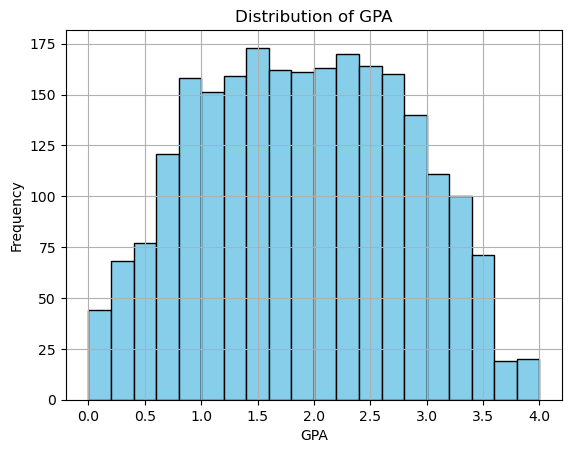

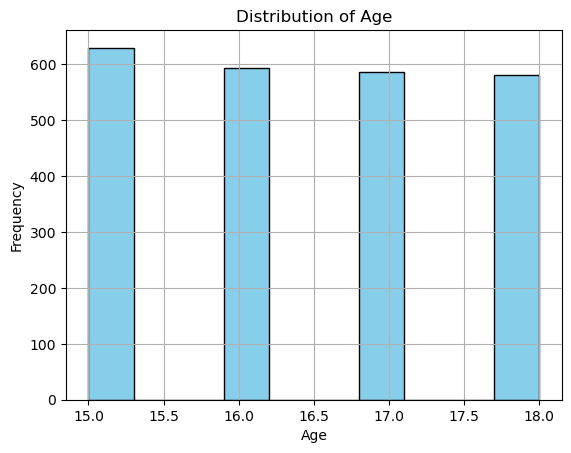

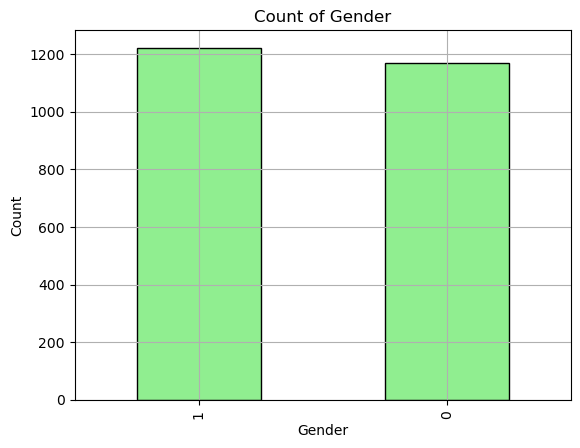

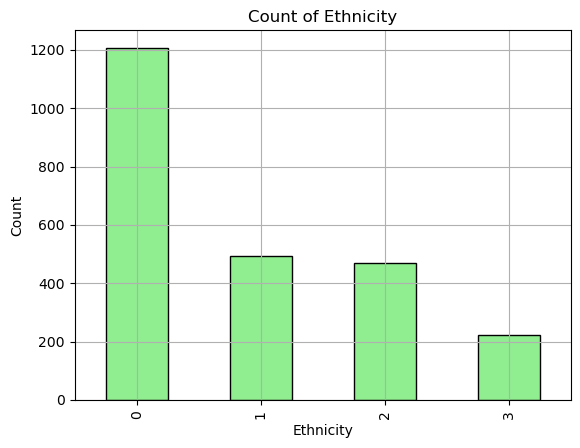

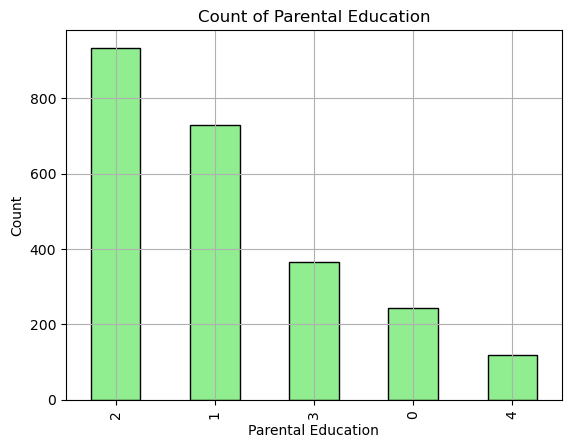

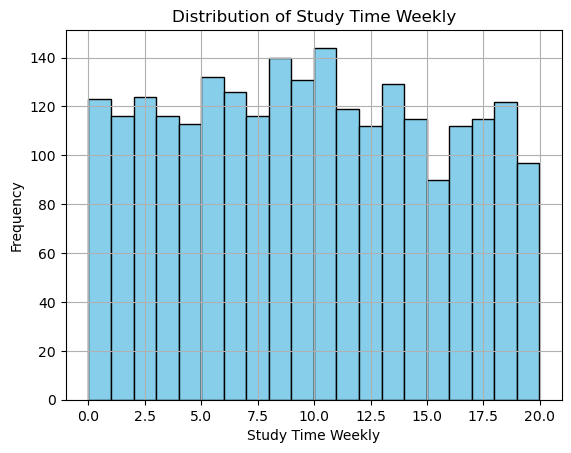

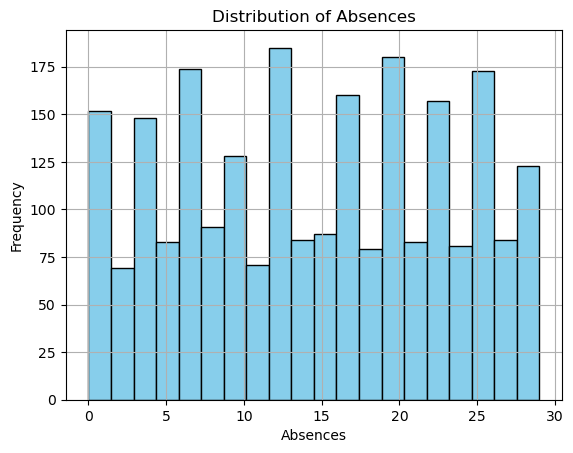

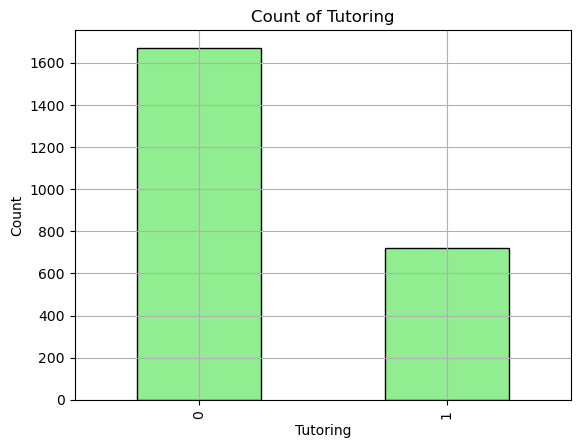

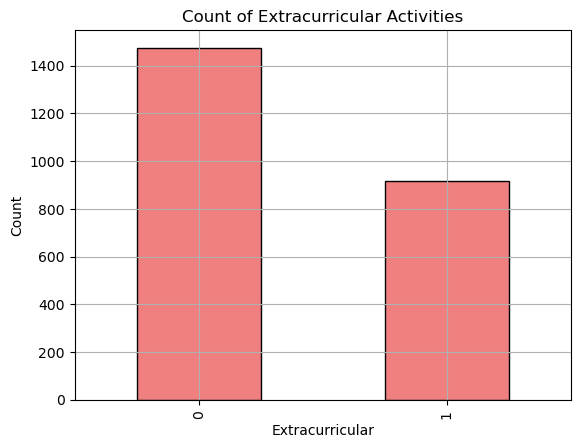

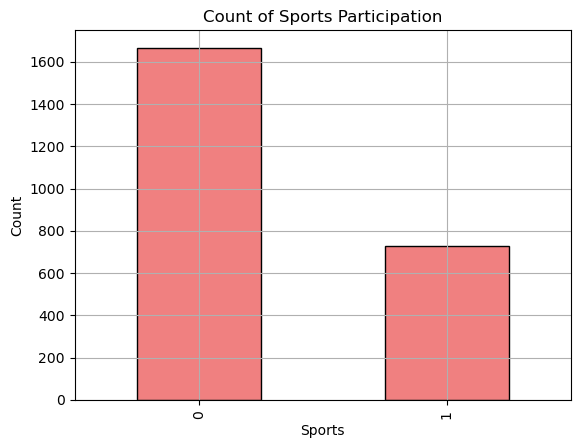

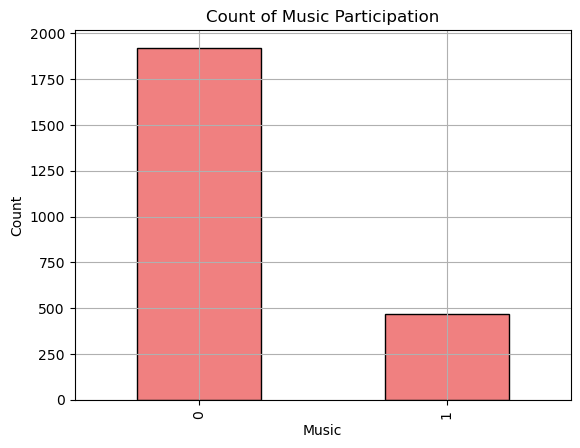

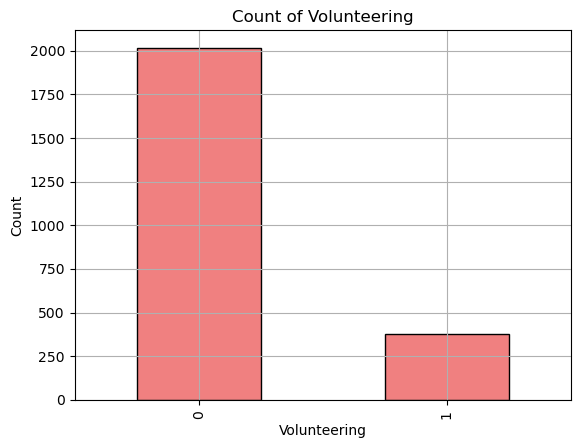

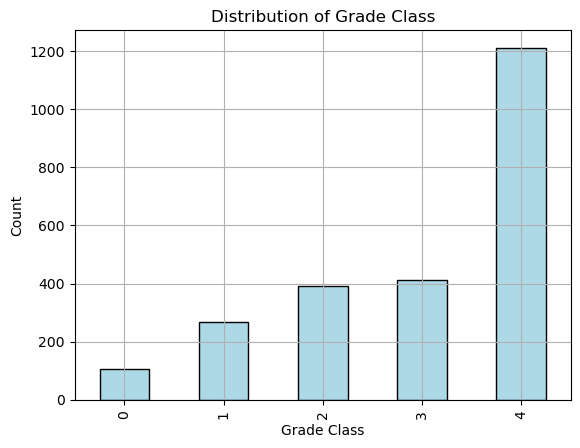

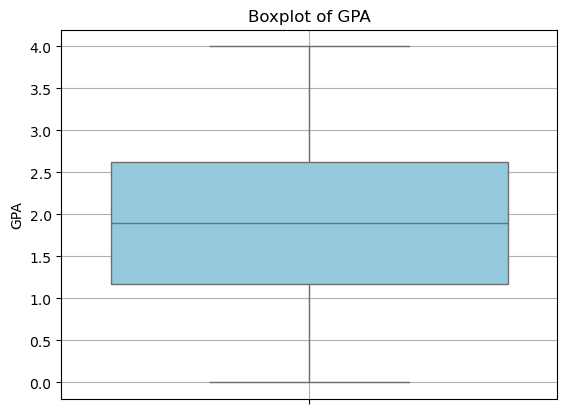

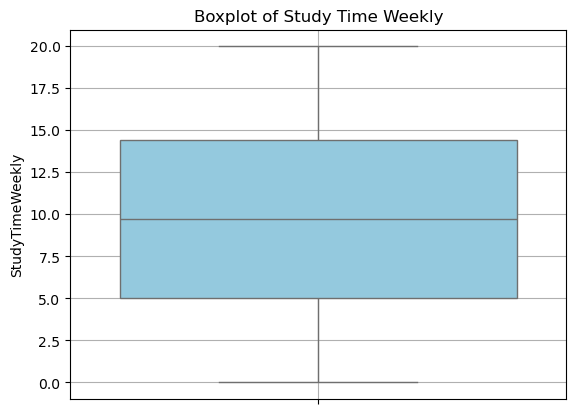

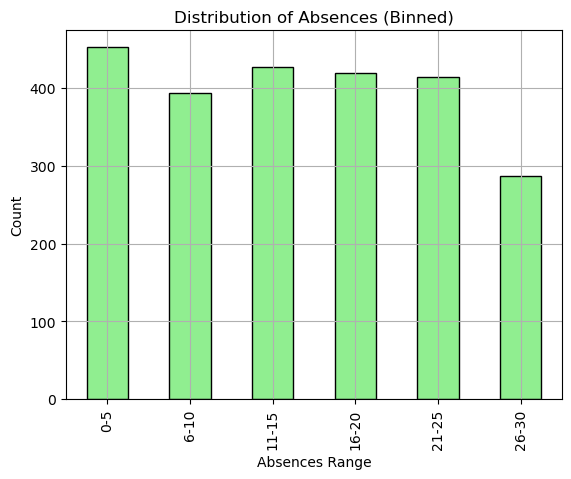

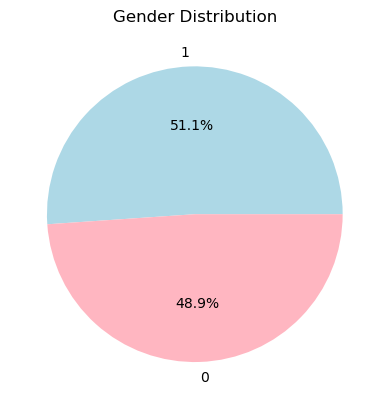

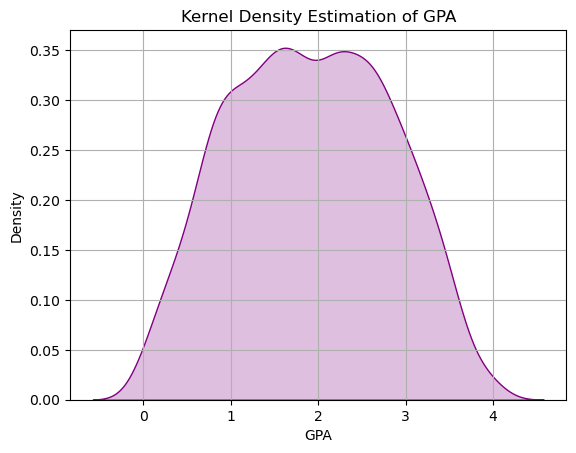


--- Bivariate Analysis ---


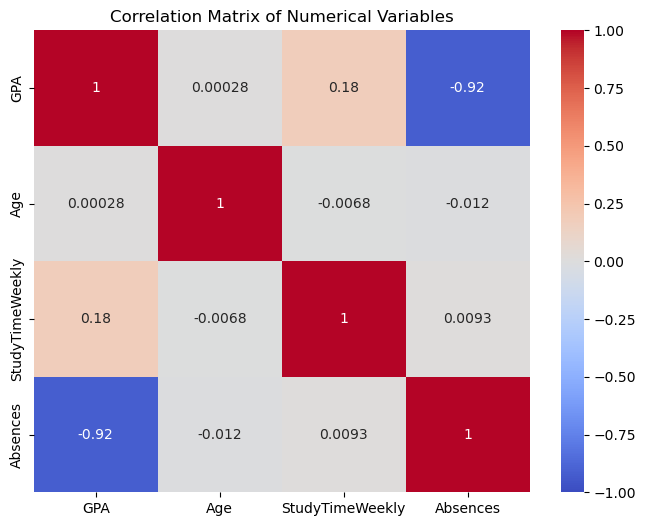

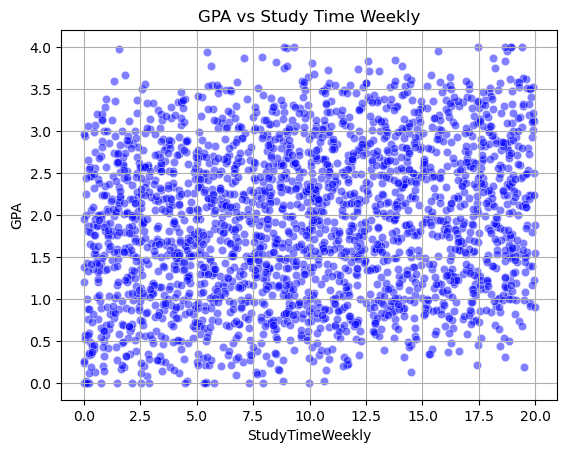

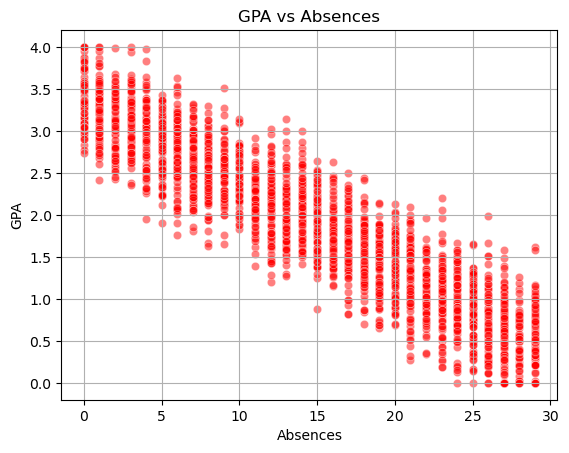

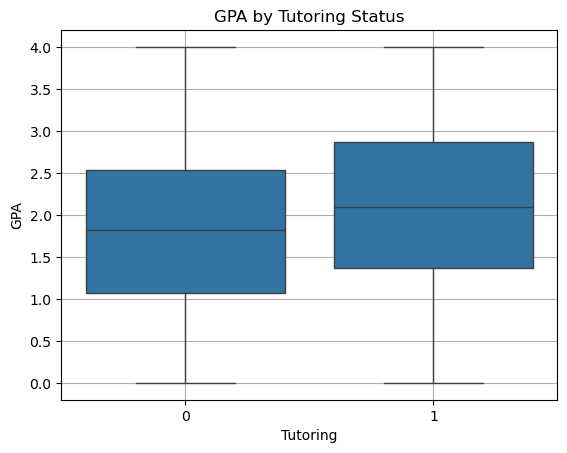

In [4]:
univariate_analysis(df)
bivariate_analysis(df)

Evaluation Metrics and model trainng and model usage


Logistic Regression:


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.647

Per-Class Metrics:
A - Precision: 0.157, Recall: 0.381, F1: 0.222
B - Precision: 0.525, Recall: 0.389, F1: 0.447
C - Precision: 0.548, Recall: 0.513, F1: 0.530
D - Precision: 0.443, Recall: 0.614, F1: 0.515
F - Precision: 0.950, Recall: 0.782, F1: 0.858

Macro Avg - Precision: 0.525, Recall: 0.536, F1: 0.514


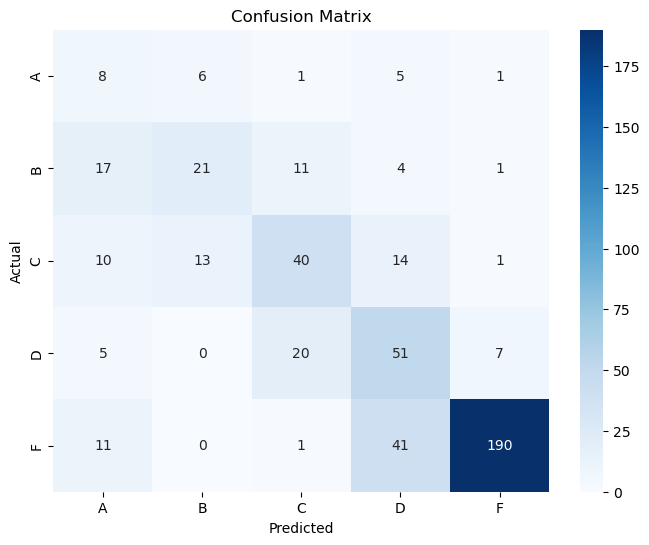


Random Forest:

Accuracy: 0.923

Per-Class Metrics:
A - Precision: 0.800, Recall: 0.571, F1: 0.667
B - Precision: 0.842, Recall: 0.889, F1: 0.865
C - Precision: 0.881, Recall: 0.949, F1: 0.914
D - Precision: 0.904, Recall: 0.904, F1: 0.904
F - Precision: 0.971, Recall: 0.959, F1: 0.965

Macro Avg - Precision: 0.880, Recall: 0.854, F1: 0.863


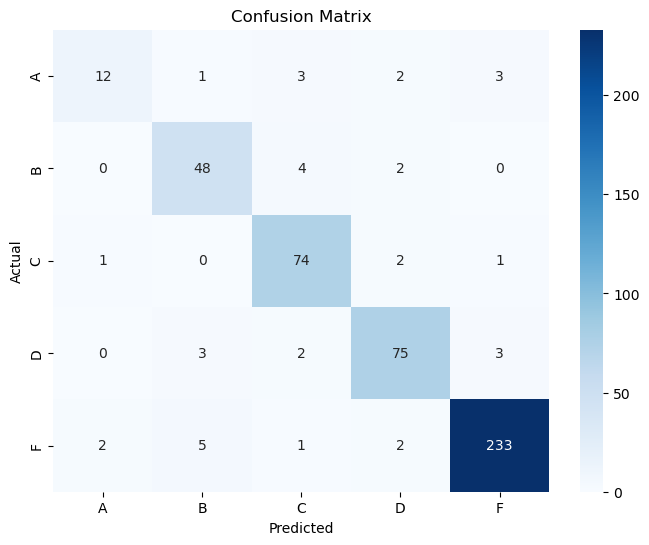


XGBoost:

Accuracy: 0.912

Per-Class Metrics:
A - Precision: 0.647, Recall: 0.524, F1: 0.579
B - Precision: 0.800, Recall: 0.889, F1: 0.842
C - Precision: 0.890, Recall: 0.936, F1: 0.912
D - Precision: 0.924, Recall: 0.880, F1: 0.901
F - Precision: 0.963, Recall: 0.955, F1: 0.959

Macro Avg - Precision: 0.845, Recall: 0.837, F1: 0.839


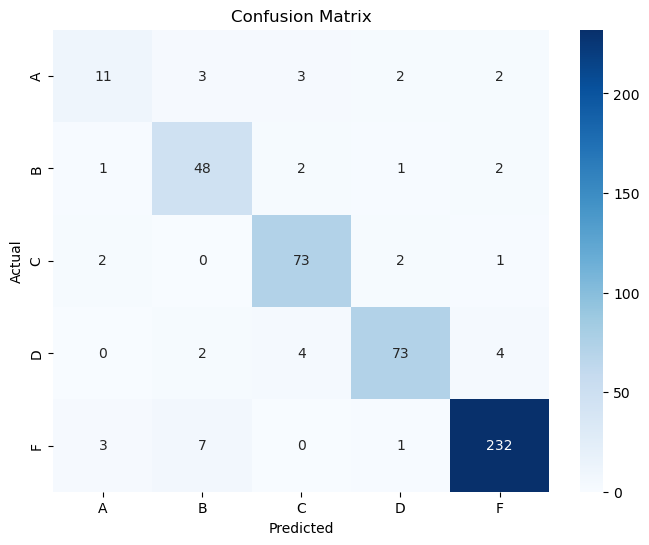

In [5]:

print("\nLogistic Regression:")
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
# Evaluate model
evaluate_classification_model(y_test, lr_pred)

# Train and test Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Evaluate model
evaluate_classification_model(y_test, rf_pred)


# Train and test XGBoost
print("\nXGBoost:")
# Adjust for class imbalance
scale_weight = len(y_train[y_train == 4]) / len(y_train[y_train != 4])
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

evaluate_classification_model(y_test, xgb_pred)


Neural Network:


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1470 - loss: 1.5940 - val_accuracy: 0.3159 - val_loss: 1.5249
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4377 - loss: 1.3899 - val_accuracy: 0.5718 - val_loss: 1.2037
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6213 - loss: 1.1805 - val_accuracy: 0.5849 - val_loss: 1.0574
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6814 - loss: 1.0720 - val_accuracy: 0.6815 - val_loss: 0.9506
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7347 - loss: 0.9572 - val_accuracy: 0.6841 - val_loss: 0.9227
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7481 - loss: 0.9148 - val_accuracy: 0.6606 - val_loss: 0.8904
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7516 - loss: 0.8737 - val_accuracy: 0.6893 - val_loss: 0.8537
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7647 - loss: 0.8403 - val_accuracy: 0.7180 - val_loss

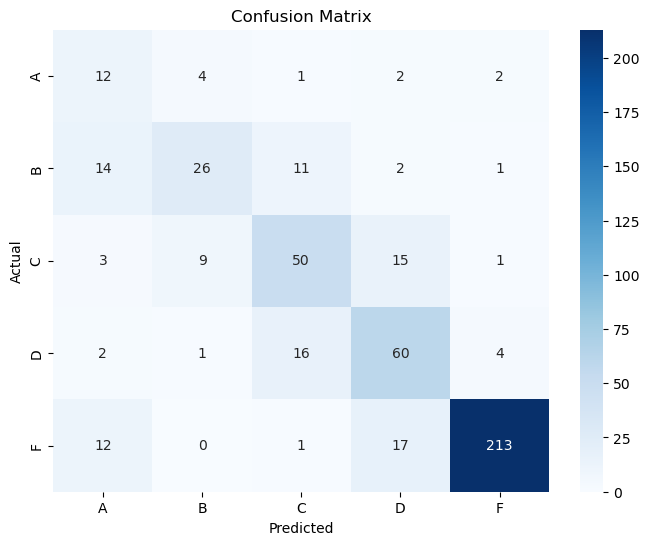

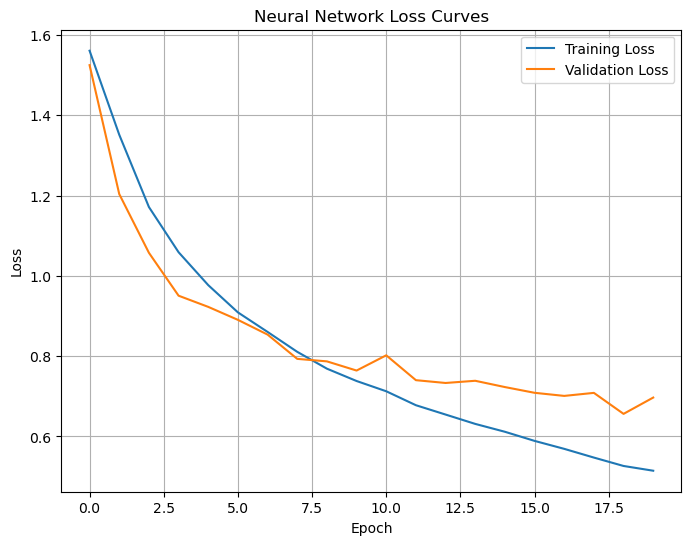

In [6]:

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print("\nNeural Network:")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode target
y_train_onehot = to_categorical(y_train, num_classes=5)
y_test_onehot = to_categorical(y_test, num_classes=5)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train_onehot, epochs=20, batch_size=32,
                   validation_split=0.2, class_weight=class_weight_dict, verbose=1)

# Predict on test set
y_pred_onehot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_onehot, axis=1)
print("Neural Network predictions:", y_pred[:10])

# Evaluate model
evaluate_classification_model(y_test, y_pred)

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()